# Andrew Ng. Неделя 2. Линейная регрессия.

## Линейная регрессия с одной переменной

Представьте, что Вы владеете сетью ресторанов и хотите открыть новую точку. У Вас есть данные о прибыли и популярности точек разных городов. Вы хотите воспользоваться накопленными данными, чтобы понять, в каком городе открыть новую точку.

Файл `Data/ex1data1.txt` содержит датасет для нашей задачи линейной регрессии. Первая колонка - популярность в городе (измеряется в 10000) и вторая - прибыль (в $100000). Негативные числа показывают убыток. 

In [1]:
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # для отображения 3D
import os


data = np.loadtxt(os.path.join('Data', 'ex1data1.txt'), delimiter=',')
X = data[:, 0]   # Поплярность в городе
y = data[:, 1]   # Прибыль
m = y.size  # Число примеров

def plotData(x, y):
    pyplot.plot(x, y, 'ro', ms=10, mec='k') # ms=marker_size, mec=marker_edge_color
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')

plotData(X, y)

# Градиентный спуск
### 1. Вычисление функции стоимости

Цель линейной регрессии - минимизировать функцию стоимости (функцию потерь).

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

где гипотеза $h_\theta(x)$ выражена линейной моделью:
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Заметьте, что параметры Вашей модели - это значения $\theta_j$. Именно эти значения будут меняться в задаче минимизации функции стоимости $J(\theta)$. Один из способов это сделать - воспользоваться алгоритмом градиентного спуска, каждая итерация которого - обновление

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{одновременно обновляем } \theta_j \text{ для всех } j$$

С каждым шагом градиентного спуска Ваши параметры $\theta_j$ всё ближе к оптимальным значениям для достижения минимума функции стоимости J($\theta$).

In [2]:
def computeCost(X, y, theta):
    """
    Вычисляем функцию стоимости для линейной регрессии. 
    Считаем при помощи коэффицинета theta параметр линейной регрессии, чтобы обучить данные в X и y.
    """
    m = y.size  # количество обучающих примеров
    J = 0
    J = (np.sum(np.square(np.subtract(np.dot(X,theta.T),y))))/(2*m)
    return J

In [3]:
# Доблавляем столбик с единичкам к X 
X = np.stack([np.ones(m), X], axis=1)

$$h_\theta(x) = \theta^Tx$$

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

In [4]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('Пусть theta=[0.0, 0.0].')
print('Тогда ожидаемое значение функции стоимости (примерно) = %.2f' % J)

print('\n')

print('Пусть theta=[-1, 2].')
J = computeCost(X, y, theta=np.array([-1, 2]))
print('Тогда ожидаемое значение функции стоимости (примерно) = %.2f' % J)

Пусть theta=[0.0, 0.0].
Тогда ожидаемое значение функции стоимости (примерно) = 32.07


Пусть theta=[-1, 2].
Тогда ожидаемое значение функции стоимости (примерно) = 54.24


### 2. Реализация градиентного спуска

Имейте в виду, что стоимость $J(\theta)$ параметризована вектором $\theta$, а не $X$ и $y$. Поэтому мы минимизируем значение $J(\theta)$ изменением значений вектора $\theta$, а не изменением $X$ или $y$. Один из хороших способов проверить, что всё работает корректно - это посмотреть на значение $J(\theta)$ и удостовериться, что с каждым шагом оно уменьшается.

При вызове функции `computeCost` на каждой итерации сохраняется значение стоимости (ошибки) в `python` list. При верно выстроенной функции `computeCost`, Ваше значение $J(\theta)$ никогда не должно увеличиваться и должно сходиться к постоянному значению.

<div class="alert alert-box alert-warning">
**Векторы и матрицы в numpy** - важные замечания

Вектор в `numpy` - это 1D-массив `np.array([1, 2, 3])`. Матрица в `numpy` - это 2D, например `np.array([[1, 2, 3], [4, 5, 6]])`. Тем не менее, вот это выражение тоже является матрицей: `np.array([[1, 2, 3]])`, так как оно имеет 2 измерения.

В связи с вышеперечисленным, функция `np.dot`, которую мы будем использовать для всех матричных/векторных перемножений - обладает следующими свойствами:

- В случае умножения матрицы на вектор, если $X$ - это матрица $m\times n$ и $y$ - вектор длины $m$, то операция `np.dot(y, X)` предполагает, что $y$ - это вектор $1 \times m$. С другой стороны, если $y$ - вектор длины $n$, то операция `np.dot(X, y)` предполагает, что $y$ - это вектор $n \times 1$.
- Вектор можно перевести в метрицу при помощи `y[None]` или `[y[np.newaxis]`. Так, если `y = np.array([1, 2, 3])` - это вектор размера 3, то `y[None, :]` - это матрица с размерностью $1 \times 3$. Мы можем воспользоваться `y[:, None]`, чтобы получить размерность $3 \times 1$.
<div>
<a id="gradientDescent"></a>

In [5]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Выполняем граидентный спуск, чтобы получить конечный вес `theta`. 
    
    X : массив. Датасет размерностью (m x (n+1)), где m - число примеров, n - число признаков. 
    y : массив. Значения функции на каждое входное значение. Вектор размерностью (m, ).
    theta : массив
            Начальные значения параметров линейной регрессии. Вектор размерностью (n+1, ).
    alpha : float
            Скорость обучения
    num_iters : int
                Количество итераций градиентного спуска
    -------
    theta : массив
            Параметры обученной линейной регрессии. Вектор размерностью (n+1, ).
    J_history : список
                python'овский список значений функции стоимости после каждой итерации.
    """
    

    m = y.shape[0]  # количество обучающих примеров
    
    # делаем копию theta, чтобы избежать изменения оригинального массива, так как массивы numpy
    # передаются по ссылке к функциям
    theta = theta.copy()
    J_history = [] # сохраняем функцию стоимости на каждой итерации
    
    for i in range(num_iters):
        # ==================== YOUR CODE HERE =================================
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        # =====================================================================
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

Значения theta, найденные методом градиентного спуска: -3.6303, 1.1664
Для населения = 35000 человек мы предсказываем выруску равную 4519.77
Для населения = 70000 человек мы предсказываем выруску равную 45342.45


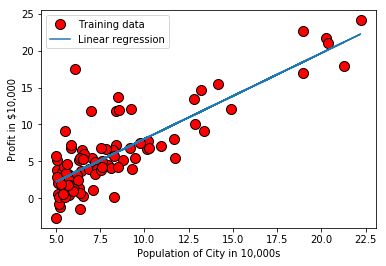

In [6]:
# инициализируем параметры обучения
theta = np.zeros(2)
# некоторые настройки для градиентного спуска
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print('Значения theta, найденные методом градиентного спуска: {:.4f}, {:.4f}'.format(*theta))

plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Training data', 'Linear regression']);

predict1 = np.dot([1, 3.5], theta) # 3,5 - потому что измеряем в десятках тысяч. 3,5 --> 3,5*10000 = 35000
print('Для населения = 35000 человек мы предсказываем выруску равную {:.2f}'.format(predict1*10000))
predict2 = np.dot([1, 7], theta)
print('Для населения = 70000 человек мы предсказываем выруску равную {:.2f}'.format(predict2*10000))